In [1]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Abrindo o dataset
dadosConcreto = pd.read_csv('Concrete_data.csv', sep=";", encoding='ISO-8859-1')
dadosConcreto.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


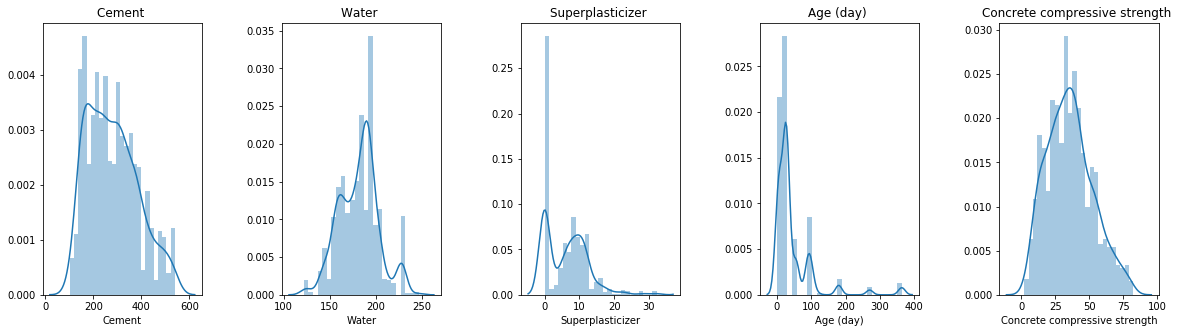

In [3]:
#Plotando os gráficos dos atributos mais importantes
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ["Cement", "Water", "Superplasticizer", "Age (day)", "Concrete compressive strength"]:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dadosConcreto[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

In [4]:
#Atributos que serão utilizados (todos)
X = dadosConcreto.iloc[:,:].values
X

array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [5]:
from sklearn.cluster import KMeans

In [6]:
#Número de clusters = 3

#init = 'random' - modo de inicialização de forma aleatória, ou seja, 
#os centróides iniciais serão gerados de forma totalmente aleatória 
#sem um critério para seleção.

kmeans = KMeans(n_clusters = 3, init = 'random')

In [7]:
#Agrupa os dados da variável X
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [8]:
#Verificando os centroides gerados através do atributo cluster_centers_
kmeans.cluster_centers_

array([[ 224.79884058,   11.42318841,  101.92492754,  173.62231884,
           7.02      , 1016.41275362,  814.60173913,   39.06376812,
          29.5726087 ],
       [ 223.59114286,  176.59542857,   34.078     ,  188.33628571,
           5.35057143,  943.35285714,  748.06171429,   39.68285714,
          35.55585714],
       [ 399.37432836,   30.93522388,   26.03761194,  182.67731343,
           6.25731343,  959.01671642,  757.9961194 ,   58.70447761,
          42.52358209]])

In [9]:
#O método fit_transform() executa o K-means para agrupar os dados e retorna uma tabela de distâncias.
distance = kmeans.fit_transform(X)
distance

array([[363.94722183, 387.0503703 , 193.59841623],
       [363.17034309, 389.42457224, 197.75280262],
       [389.11719494, 304.49777496, 303.25836962],
       ...,
       [198.34887497, 128.40798268, 296.37579702],
       [216.70568114,  97.83119432, 292.70493166],
       [191.19121705, 125.87222496, 192.5185822 ]])

In [10]:
#Retorna os labels para cada instância, ou seja, o código do cluster que a instância de dados foi atribuído.
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 1, 1, 1])

1 40847591.17256504
2 31473157.37168515
3 24995779.9595912
4 21989824.85336204
5 19996120.226619665
6 17694318.55559975
7 15927918.723443458
8 14555737.798995664
9 13466163.992678907
10 12548774.679446727


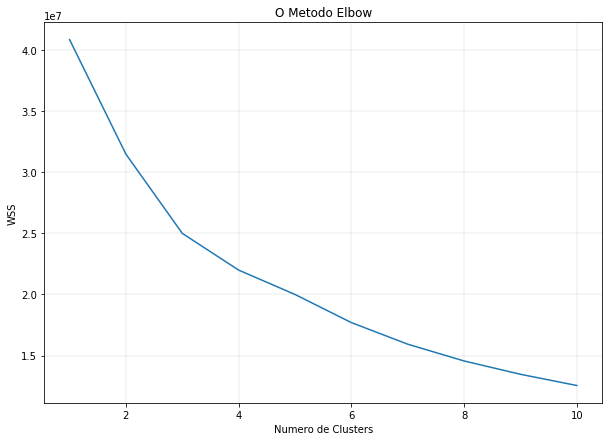

In [11]:
#Plotando um gráfico e observar o cotovelo (Elbow) se formando.

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.grid(True, lw = 0.25)
plt.show()

In [12]:
#Número de clusters = 3 
#A partir do número de três clusters as distâncias dos erros quadráticos praticamente se estabiliza.
#A partir do número de três clusters não temos uma diminuição tão expressiva.

### Visualizando os resultados - Clusters e Centroides

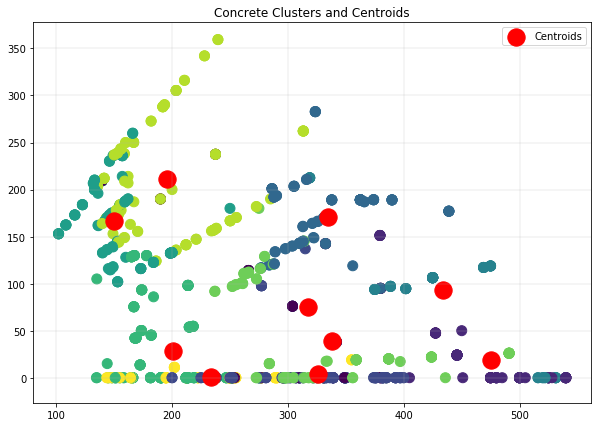

In [14]:
#Os pontos em vermelho conforme mostra a legenda na parte superior direita do gráfico são os centroides.

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Concrete Clusters and Centroids')
plt.grid(True, lw = 0.25)
plt.legend()
plt.show()